In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Autocorrelation and ARIMA modeling

## Putting together what we've learned

This term so far, we've explored two different time series models. Consider an autoregressive model of order $p$ ($AR(p)$):

$$y_t = \mu +  \sum_{i=1}^p \rho_i y_{t-i} + \varepsilon_t$$

And a moving average process of order q ($MA(q)$) model:

$$y_t = \mu + \sum_{i=1}^q \theta_{i} \varepsilon_{t-i} + \varepsilon_t$$

Putting them together yields the autoregressive-moving average model of order $p$ and $q$ (an $ARMA(p, q)$ model)

$$y_t = \mu + \rho_1 y_{t-1} + \rho_2 y_{t-2} + ... + \rho_p y_{t-p} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} + \varepsilon_t $$

## Dealing with non-stationarity

A fundamental assumption of all our models to this point is that the data are stationary (see our unit root lectures). Violations of the stationarity of the data can lead to biased estimates of the coefficients, and ultimately inaccurate forecasts. 

As we saw before a popular way of dealing with non-stationarity in data is by taking the first (or higher) difference of the data. Then, we hope we'll have properly stationary data in order to apply our ARIMA models to. 

Let the level of differencing be $d$, then the ARMA model above has a third parameter (known also as the order of integration). The result is the $ARIMA(p, d, q)$ model. 

## Detecting non-stationarity

We've already gone over unit root tests for detecting non-stationarity. We also have several other methods available to us. One is by examining two functions related to the time series

### Autocorrelation function (ACF)

The autocorrelation function plots the degree of autocorrelation across time lags in the data. Suppose I had a time series process $\{X_t\} = x_t, x_{t-1}, x_{t-2}, ...$. Recall that the correlation between $x_t$ and $x_{t-\tau}$ is just 

$$ corr(x_t, x_{t-\tau}) = \frac{cov(x_t, x_{t-\tau})}{sd(x_t)sd(x_{t-\tau})} = ACF(\tau)$$

for the relevant range of $\tau$. 

Autocorrelation functions should decline quickly towards zero for stationary processes. An ACF which shows positive correlations in the data for long lags suggests highly non-stationary data.

## Examining data 

Here we import some public data on website usage, and plot the data, followed by a first difference of the data, followed by a second difference.

In [3]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

df.head()

,value
0,88
1,84
2,85
3,85
4,84


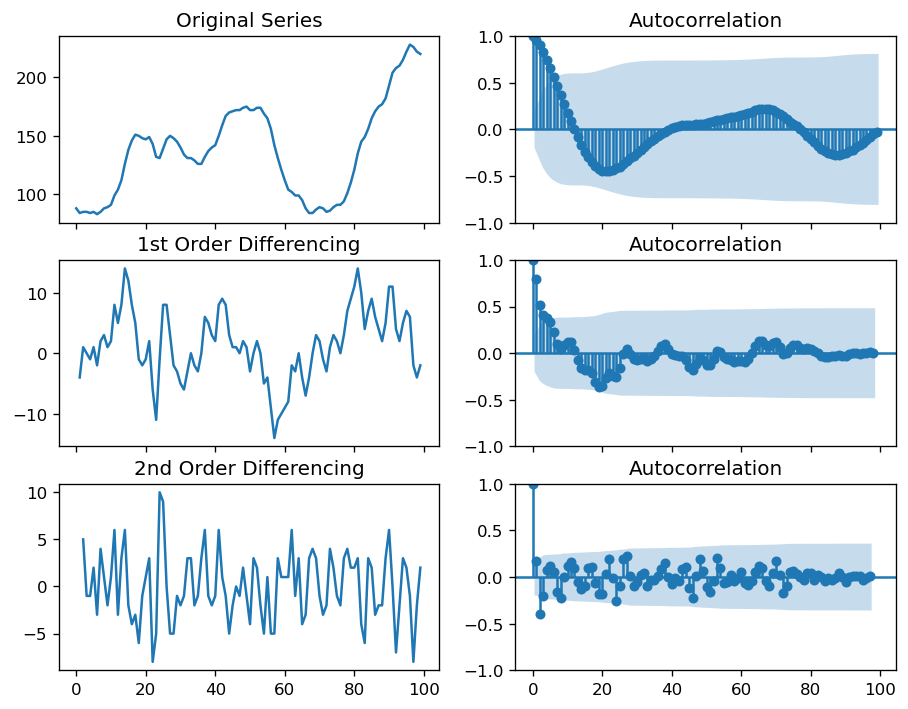

In [3]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1], lags=np.arange(len(df.value)))

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1], lags=np.arange(len(df.value.diff().dropna())))

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], lags=np.arange(len(df.value.diff().diff().dropna())))

plt.show()

We can see from the first plot, the series is highly non-stationary. The autocorrelation function for the original data suggests a high degree of correlation through the fifth or sixth lags of the data (the blue shaded region indicates statistical significance). 

The second row of plots examines the first difference of the data. We can see that the overall trend has largely disappeared, but the data still clearly has micro-trends in it during periods (i.e. we can see periods where the first difference increases period after period). The autocorrelation function still indicates a large degree of autocorrelation through the fifth lag of the data, indicating that the first difference is also nonstationary. 

The third row finally shows data that appears to be stationary. All trends have disappeared from the data, and it's properly oscillating around zero. The autocorrelation function clearly approaches zero quickly, suggesting the second difference of the series is stationary.

### Unit root testing

Let's test the data for a unit root with the ADF test to see if it confirms our ACF checks. 

In [4]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(df['value'].dropna(), autolag = 'AIC')

df_stat = res[0]
p_val = res[1]
lags_used = res[2]
n_obs = res[3]
crit_vals = res[4]
max_IC = res[5]

print(f'The DF test statistic is {df_stat}')
print(f'The DF critical values used for hypothesis testing are {crit_vals}')
print(f'The p-value is {p_val}')
print(f'Lags used: {lags_used}')
if p_val < 0.05:
    print('We can reject the hypothesis of theta = 0, so the time series is stationary and there is no unit root.')
else:
    print('We cannot reject the hypothesis that theta = 0, therefore we conclude there is a unit root.')

The DF test statistic is -2.4642397172033674
The DF critical values used for hypothesis testing are {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}
The p-value is 0.12441935447109487
Lags used: 3
We cannot reject the hypothesis that theta = 0, therefore we conclude there is a unit root.


In [5]:
#Create first difference and drop NA datapoint
data_1diff = df['value'].diff().dropna()

res = adfuller(data_1diff, autolag = 'AIC')

df_stat = res[0]
p_val = res[1]
lags_used = res[2]
n_obs = res[3]
crit_vals = res[4]
max_IC = res[5]

print(f'The DF test statistic is {df_stat}')
print(f'The DF critical values used for hypothesis testing are {crit_vals}')
print(f'The p-value is {p_val}')
print(f'Lags used: {lags_used}')
if p_val < 0.05:
    print('We can reject the hypothesis of theta = 0, so the time series is stationary and there is no unit root.')
else:
    print('We cannot reject the hypothesis that theta = 0, therefore we conclude there is a unit root.')

The DF test statistic is -2.722238490442953
The DF critical values used for hypothesis testing are {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}
The p-value is 0.07026846015272707
Lags used: 2
We cannot reject the hypothesis that theta = 0, therefore we conclude there is a unit root.


In [6]:
#Create second difference and drop NA datapoint
data_2diff = data_1diff.diff().dropna()

res = adfuller(data_2diff, autolag = 'AIC')

df_stat = res[0]
p_val = res[1]
lags_used = res[2]
n_obs = res[3]
crit_vals = res[4]
max_IC = res[5]

print(f'The DF test statistic is {df_stat}')
print(f'The DF critical values used for hypothesis testing are {crit_vals}')
print(f'The p-value is {p_val}')
print(f'Lags used: {lags_used}')
if p_val < 0.05:
    print('We can reject the hypothesis of theta = 0, so the time series is stationary and there is no unit root.')
else:
    print('We cannot reject the hypothesis that theta = 0, therefore we conclude there is a unit root.')

The DF test statistic is -9.929762173626017
The DF critical values used for hypothesis testing are {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}
The p-value is 2.8434287555470966e-17
Lags used: 1
We can reject the hypothesis of theta = 0, so the time series is stationary and there is no unit root.


Both the raw data and the first difference of the data show no evidence of stationarity (although the first difference is close), but the second difference of the data is clearly stationary. Therefore our tests are in concurrence! Since the first difference is close to being significant, one could argue that either the first or second difference are the correct ones to use for modeling. 

### Partial autocorrelation function (PACF)

The partial autocorrelation function adjusts the ACF by partialling out the individual correlations between $t$ and $t-\tau$. Imagine that we have three observations in a time series $\{X_t\}$: $x_t$, $x_{t-1}$, and $x_{t-2}$.

There are two paths via which $x_t$ and $x_{t-2}$ can be correlated. One is through the intervening $x_{t-1}$ (i.e., $x_{t-2}$ affects $x_{t-1}$ which, in turn, affects $x_t$. Or, $x_{t-2}$ could affect $x_t$ directly, independently of it's effect on $x_{t-1}$. This is the **partial autocorrelation** between $x_t$ and $x_{t-2}$. Formally this would be expressed as:

$$ PACF(x_t, x_{t-2}) = \frac{cov(x_t, x_{t-2} | x_{t-1})}{sd(x_t|x_{t-1}) sd(x_{t-2}|x_{t-1})} $$

Which generalizes to whatever lag length you desire. 

Let's choose a lag length of 1 and plot the PACF for our data

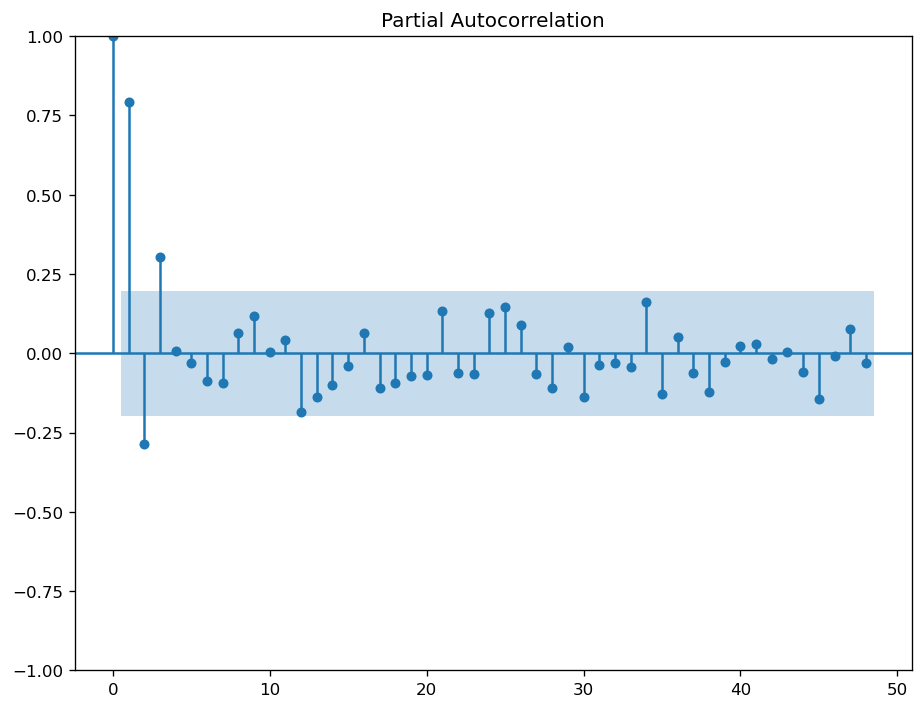

In [17]:
# 1st Differencing
plot_pacf(df.value.diff().dropna(), lags = len(df.value.diff().dropna())/2-1)

plt.show()

As we can see, the partial autocorrelations are significant out to about 2-4 lags of the data. 

## Using ACF and PACF to set lag lengths

Because the PACF estimates the direct correlation between observations at each specific lag length, it can be used to inform the AR structure of the model. Generally speaking you should use a $p$ equal to the number of lags that have significant partial autocorrelation. In this case, 2-4 lags would be appropriate, with a bias towards having a more parsimonious model to prevent overfitting.

The ACF is usually informative for the MA structure of the model because the autocorrelation function is a function of all correlations even through intervening lags (similar to how the MA model works). If we use $d=1$, then an appropriate lag length for $q$ would be between 2-5. 

## Fitting an ARIMA model

Let's choose $d=1$, $p=3$ and $q=2$ to estimate our ARIMA model.

In [95]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df.value, order = (3,1,2))
model_fit = arima_model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -251.959
Date:                Sat, 23 Mar 2024   AIC                            515.918
Time:                        14:22:34   BIC                            531.489
Sample:                             0   HQIC                           522.218
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0711      0.470      2.279      0.023       0.150       1.992
ar.L2         -0.6013      0.367     -1.636      0.102      -1.322       0.119
ar.L3          0.3364      0.184      1.829      0.0

## Model diagnostics

Checking the models residuals is a key part of fitting time series. If our model does a good job, then we should see no predictivity in the model residuals.

In the top row, we expect to see no obvious patterns in the series of residuals from one time period to the next, and that they follow a normal distribution centered around zero. Here they clearly do, so our checks look good. 

The Q-Q plot checks which quantiles the residuals fall into compared to their theoretical values if they were to come from a standard normal distribution. All the values along the red line are exactly what we expect to see.

The correlogram just checks the autocorrelation of the errors. We expect to see none (except with themselves at $t=0$), and that's what we get here.

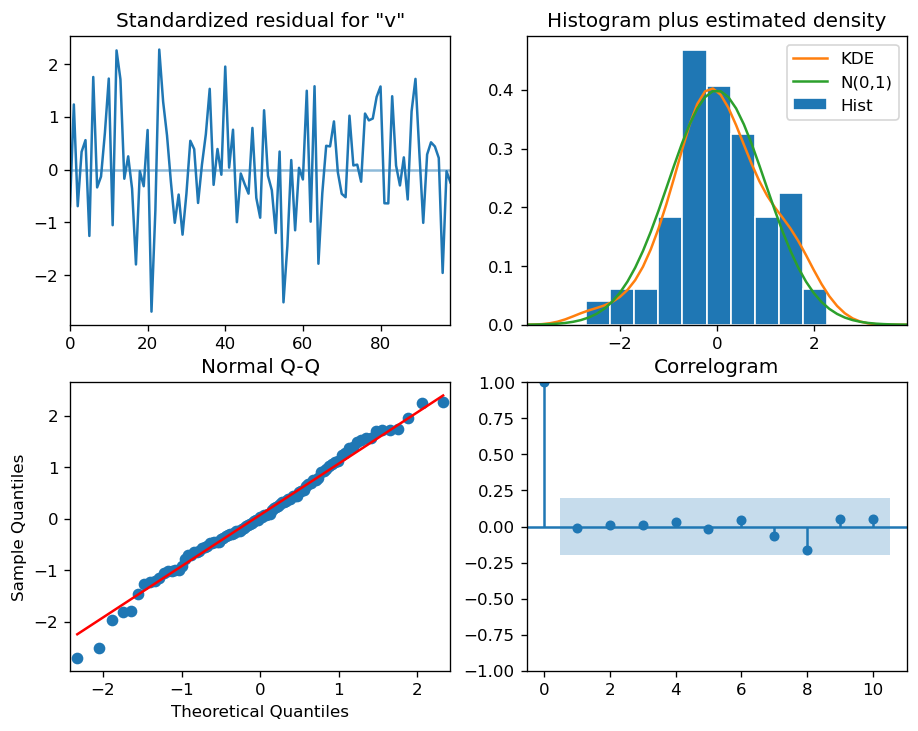

In [96]:
# Check residuals 
model_fit.plot_diagnostics()
plt.show()

Let's fit our model predictions to the training data to see how well it does in-sample.

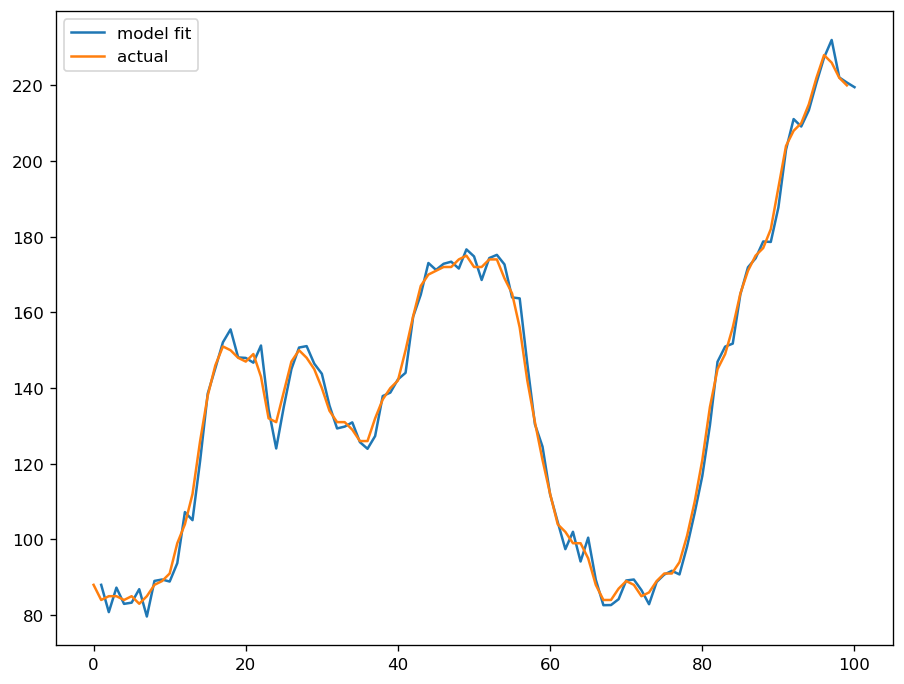

In [97]:
#plot predictions over training period
model_fit.predict(1, 100).plot()

#plot actuals
df.value.plot()

plt.legend(['model fit', 'actual'])

As we can see, our selected model does a very good job fitting the data. Let's try validating this model out-of-sample to see how it handles a forecast. 

## Forecasting with ARIMA models

Validation of time series forecasts is somewhat different than usual machine learning. Rather than separate random samples of the data, we need to choose chunks of time to forecast over in order to validate the forecast. 

Here, let's separate out the last 15% of the data to hold out for a forecast validation.

We can call the forecast with `.forecast()`

In [98]:
#split data
train = df.value[:85]
test = df.value[85:]

#re-train model up to time cutoff
model = ARIMA(train, order=(3, 1, 2))  
train_fit = model.fit()

#make forecast
fcst_res=train_fit.get_forecast(15)
fc = fcst_res.predicted_mean

#Generate forecast intervals with 95% confidence
conf = fcst_res.conf_int(alpha = 0.05)
conf

,lower value,upper value
85,157.658432,169.802562
86,154.064066,182.947526
87,148.952487,194.385477
88,144.469643,205.374644
89,138.409295,215.068912
90,132.461683,223.916757
91,126.800320,232.212156
92,120.806856,239.640434
93,115.164999,246.595807
94,109.705828,253.091095


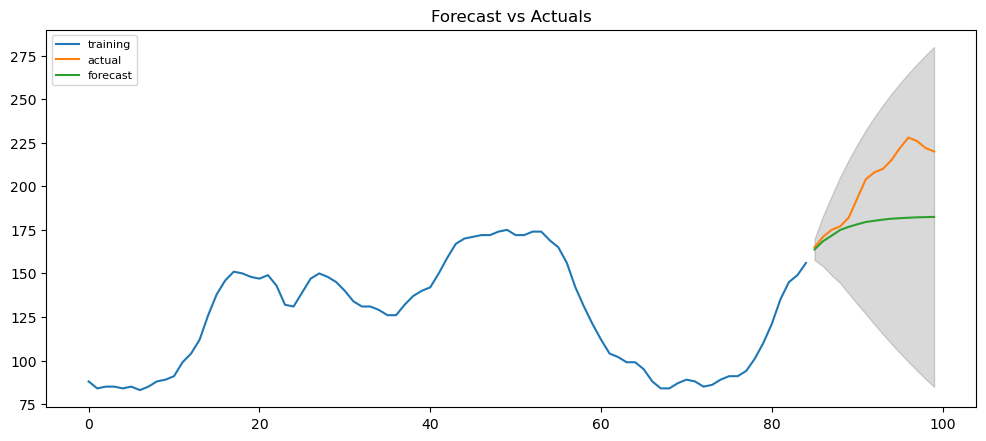

In [99]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf['lower value'], index=test.index)
upper_series = pd.Series(conf['upper value'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

From the chart, we can see our forecast does a good job, especially for the first few observations. The actual values are well within the forecast interval. However the model consistently underpredicts after the first five periods or so. Perhaps there's a way to improve the forecast. Let's re-train the model with $d=2$ to take care of the remaining non-stationarity from $d=1$.

C:\Users\Harlan Holt\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Harlan Holt\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


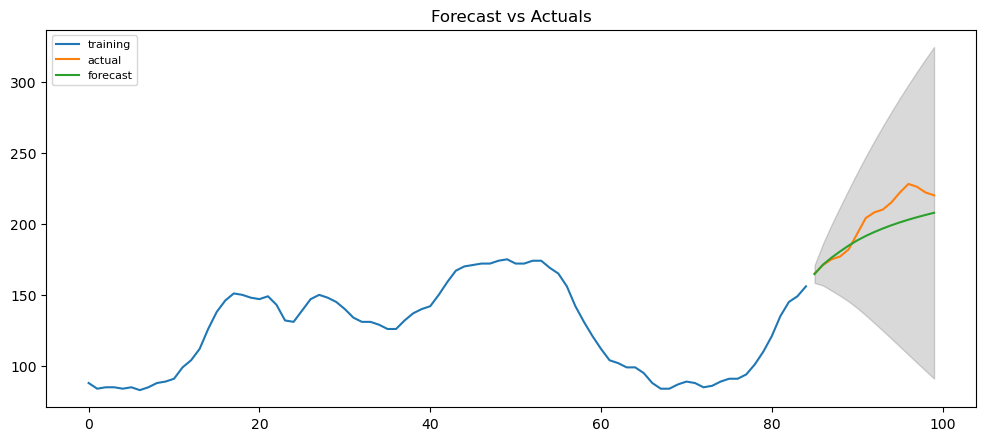

In [101]:
#split data
train = df.value[:85]
test = df.value[85:]

#re-train model up to time cutoff
model = ARIMA(train, order=(3, 2, 2))  
train_fit = model.fit()

#make forecast
fcst_res=train_fit.get_forecast(15)
fc = fcst_res.predicted_mean

#Generate forecast intervals with 95% confidence
conf = fcst_res.conf_int(alpha = 0.05)

#set series for plot
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf['lower value'], index=test.index)
upper_series = pd.Series(conf['upper value'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

As we can see this model does a much better job than the first one, although there is some remaining overprediction. Try removing the final MA lag on your own - the MA lags from the original ARIMA regression were highly insignificant, suggesting they aren't adding much to the model's ability to describe the data.

## Making the forecast

Let's take our trained model to all the data as we did previously and generate a forward forecast.

C:\Users\Harlan Holt\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Harlan Holt\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Harlan Holt\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


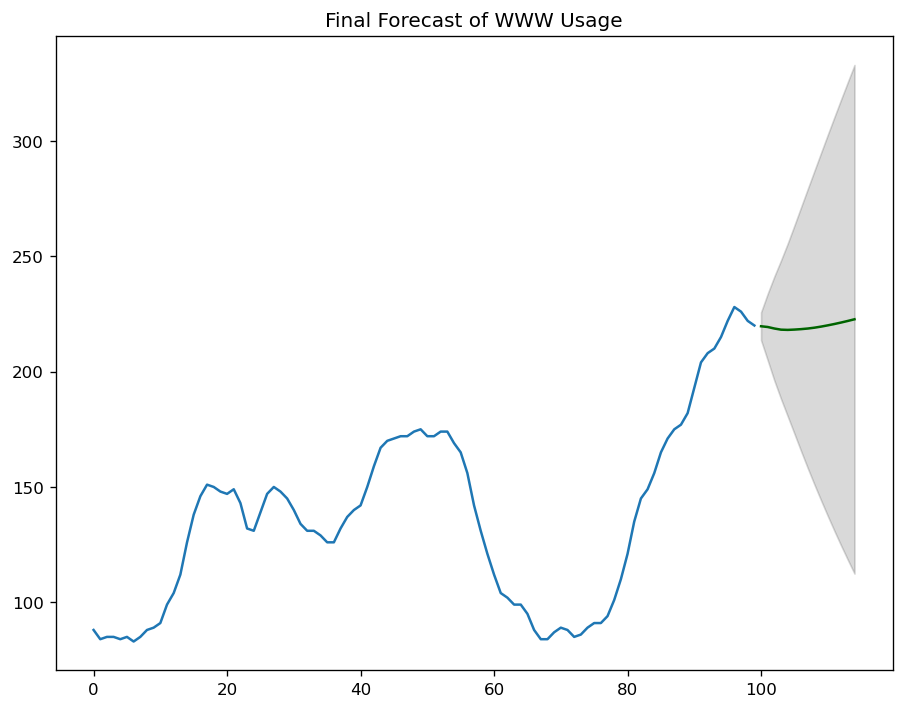

In [111]:
#Train full model up to present
arima_model = ARIMA(df.value, order = (3,2,2))
model_fit = arima_model.fit()

# Forecast
n_periods = 24
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

#make forecast
fcst_res=model_fit.get_forecast(15)
fc = fcst_res.predicted_mean

#Generate forecast intervals with 95% confidence
conf = fcst_res.conf_int(alpha = 0.05)

#set series for plot
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(conf['lower value'], index=index_of_fc)
upper_series = pd.Series(conf['upper value'], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

## Using information criteria to select models

As we've already covered in with ADF test, we can also use information criteria to select the optimal lag structure for our models instead of the ACF and PACF functions (a good practice is to use both, but the selection decision on a model is up to you - the researcher!). Here we'll test multiple model specifications and choose the one with the best (lowest) information criteria. 

Let's use a new package `pmdarima` to help us.


In [108]:
pip install pmdarima --user

  Using cached pmdarima-2.0.4-cp39-cp39-win_amd64.whl (614 kB)
Note: you may need to restart the kernel to use updated packages.


In [110]:
import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series - 1 = non-seasonal
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      information_criterion = 'aic' #use AIC to determine best model
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

The model selected here was an `ARIMA(2,2,0)` model. Let's see how it compares in a forecast to our previous model!

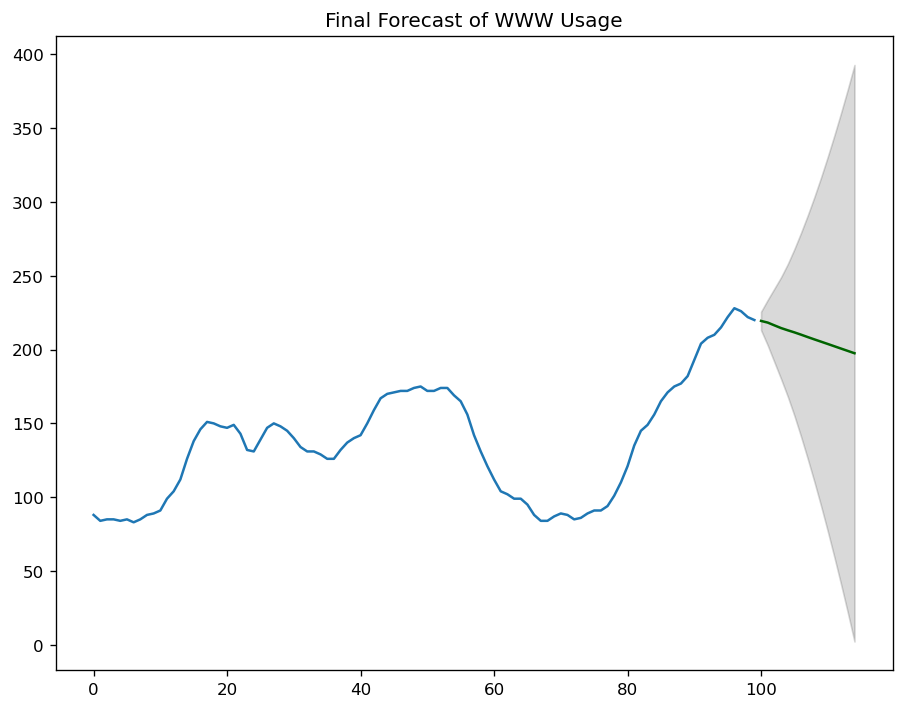

In [114]:
#Train new model based on auto-arima
#Train full model up to present
arima_model = ARIMA(df.value, order = (2,2,0))
model_fit = arima_model.fit()

# Forecast
n_periods = 24
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

#make forecast
fcst_res=model_fit.get_forecast(15)
fc = fcst_res.predicted_mean

#Generate forecast intervals with 95% confidence
conf = fcst_res.conf_int(alpha = 0.05)

#set series for plot
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(conf['lower value'], index=index_of_fc)
upper_series = pd.Series(conf['upper value'], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

Interesting - Predictions are way different for this model than the one we trained!

## Exercise

Download the following dataset, and do a modeling and forecasting exercise on it like we did here: https://www.kaggle.com/datasets/shenba/time-series-datasets